# absorption

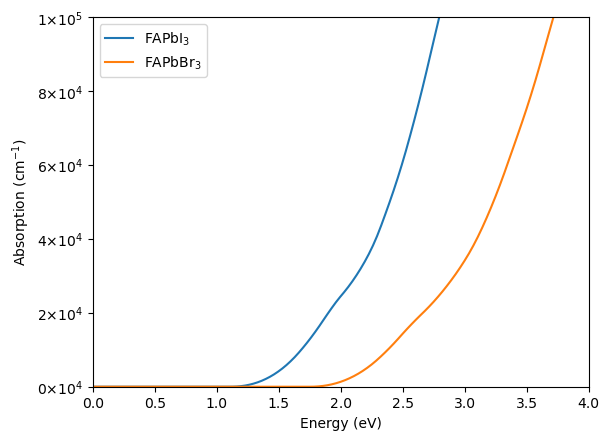

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import ScalarFormatter

materials = {
    #"FAPbI$_3$_HSE43": {
    #    "dir" : 2.189, 
    #    "indir" :2.189, 
    #    "folder": "./primitive/I/HSE43/"
    #},
    #"FAPbBr$_3$_HSE43":{
    #    "dir": 2.73,
    #    "indir": 2.73,
    #    "folder": "./primitive/Br/HSE43/"
    #},
    "FAPbI$_3$":{
        "dir": 1.195,
        "indir": 1.195,
        "folder": "./primitive/I/SOC43/"
    },
    "FAPbBr$_3$":{
        "dir": 1.806,
        "indir": 1.806,
        "folder": "./primitive/Br/SOC43/"
    },
}

#overrides = {"figure.figsize": [5, 4]}
#plt.style.use(["style.mplstyle", overrides])
fig, ax = plt.subplots()

for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + 'absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    ax.plot(energy, alpha_cm, label=material)

ax.set(xlim=[0,4],ylim = [0,1e5], xlabel='Energy (eV)', ylabel='Absorption (cm$^{-1}$)')
plt.legend()

# Custom formatter function to display labels as multiples of 10^4
def custom_formatter(x, pos):
    if x == 100000:
        return '1×10$^{5}$'  # Specific format for 100,000
    return f'{int(x/10000)}×10$^{4}$'

ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))

# SLME

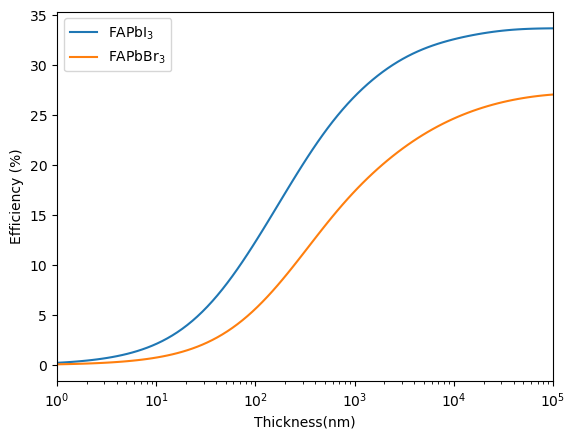

In [2]:
import pymatgen.analysis.solar.slme as slme

thickness = np.logspace(-9, -4, 100, endpoint=True)
thickness_nm = thickness*1000000000

#overrides = {"figure.figsize": [6, 4]}
#plt.style.use(["style.mplstyle", overrides])

for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + 'absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    effSlm = []
    for i in thickness:
        eff = data = slme.slme(energy,alpha_cm,material_data["dir"],material_data["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
        effSlm.append(eff)
    plt.plot(thickness_nm, effSlm, label = material)

plt.xscale('log')
plt.margins(x=0)
plt.xlabel("Thickness(nm)")
plt.ylabel("Efficiency (%)")
plt.legend()